<a href="https://colab.research.google.com/github/KrungSalad/Google_Colab/blob/master/Lab_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U quandl 

In [0]:
# Stock data 
import quandl
import datetime
# Analyzing 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics 
import folium
from folium import plugins
import pylab as pl

In [0]:
df = pd.read_csv("AMZN.csv", parse_dates=["Date"])

df = df.drop_duplicates(keep='last') 
df = df.dropna()
df["Close"] = (df["Close"]-df["Close"].min())/(df["Close"].max()-df["Close"].min())

close = df[["Date","Close"]]



In [4]:
Next_N_day = int(60) # predicting 30 days into future
close['Prediction'] = close[['Close']].shift(-Next_N_day) #  label column with data shifted 30 units up

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
close_Next_N_day = close[-Next_N_day:] # set X_forecast equal to last 30
close = close[:-Next_N_day] # remove last 30 from X
GT = close[:-60]
x_test = close.iloc[5247-30-60:5247-30]
y_test = close.iloc[5247-30-60:5247-30]
x_test = x_test[['Close']]
y_test = y_test['Prediction']

In [6]:
close

,Date,Close,Prediction
0,1997-05-16,0.009281,0.012817
1,1997-05-19,0.009124,0.012817
2,1997-05-20,0.008578,0.012503
3,1997-05-21,0.007008,0.012189
4,1997-05-22,0.006770,0.011636
...,...,...,...
5183,2017-12-21,0.733971,0.989620
5184,2017-12-22,0.729952,0.965907
5185,2017-12-26,0.735227,0.935425
5186,2017-12-27,0.738681,0.973292


In [7]:
GT

,Date,Close,Prediction
0,1997-05-16,0.009281,0.012817
1,1997-05-19,0.009124,0.012817
2,1997-05-20,0.008578,0.012503
3,1997-05-21,0.007008,0.012189
4,1997-05-22,0.006770,0.011636
...,...,...,...
5123,2017-09-26,0.585668,0.733971
5124,2017-09-27,0.593374,0.729952
5125,2017-09-28,0.596846,0.735227
5126,2017-09-29,0.599955,0.738681


In [0]:
X = GT[['Close']]
Y = GT['Prediction']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2 , random_state = 100) 

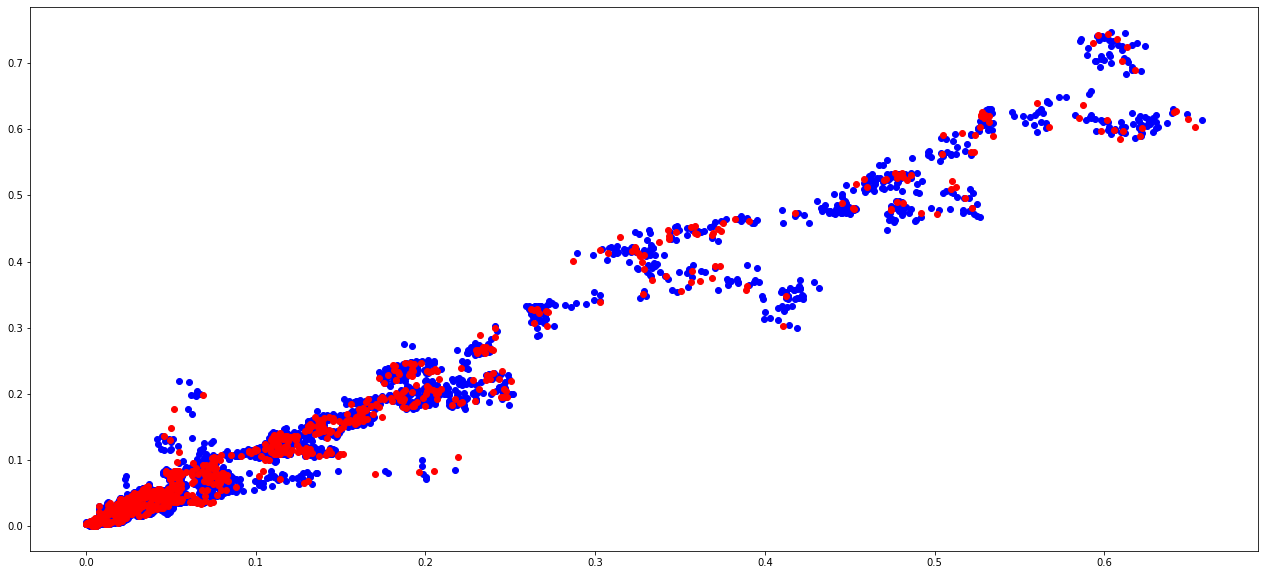

In [9]:
plt.figure(figsize=(22,10))   # scatter plot ความสัมพันธ์ของค่า X_train, y_train และ X_test, y_test 
plt.scatter(X_train, Y_train, marker='o', color='blue' )
plt.scatter(X_test, Y_test, marker='o', color='red')
plt.show()
 

In [0]:

kf = model_selection.KFold(n_splits = 5, random_state = 100, shuffle= True) 
# Linear Regression Model   
LRM = LinearRegression()   
# Support Vector Regression (SVR) Model จำนวน 3 รูปแบบ kernel   
c_val  = 1 # ค่าปรับเข้มงวดกับ outlier bound [10^-6, 10^6] ค่าที่น่าสนใจ 1000 
gramma_value = 0.1 # ค่าการควบคุมรูปร่างของโมเดล [10^-6, 10^6] ค่าน่าสนใจ 0.1 

gmm = gramma_value

svr_lin = SVR(kernel='linear', C=c_val) 
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=gmm) 
svr_poly = SVR(kernel='poly', C=c_val, degree=2)  

In [0]:
score_LRM = model_selection.cross_val_score(LRM , X = X_train.values , y = Y_train.values , cv = kf ) 
score_lin = model_selection.cross_val_score(svr_lin , X = X_train.values , y = Y_train.values , cv = kf ) 
score_rbf = model_selection.cross_val_score(svr_rbf , X = X_train.values , y = Y_train.values , cv = kf ) 
score_poly = model_selection.cross_val_score(svr_poly , X = X_train.values , y = Y_train.values , cv = kf )
scoreMean_LRM = score_LRM.mean() 
scoreMean_lin = score_lin.mean() 
scoreMean_rbf = score_rbf.mean()
scoreMean_poly = score_poly.mean()  
scoreStd_LRM = score_LRM.std()
scoreStd_lin = score_lin.std()
scoreStd_rbf = score_rbf.std()
scoreStd_poly = score_poly.std()

In [12]:
print(score_LRM)
print(score_lin)
print(score_rbf)
print(score_poly)
print(scoreMean_LRM)
print(scoreMean_lin)
print(scoreMean_rbf)
print(scoreMean_poly)
print(scoreStd_LRM)
print(scoreStd_lin)
print(scoreStd_rbf)
print(scoreStd_poly)

[0.97404987 0.97071681 0.97305395 0.97507556 0.96930659]
[0.94783767 0.96475334 0.94170858 0.9612021  0.95108718]
[0.89695549 0.88883992 0.89017811 0.90175689 0.90601011]
[0.80286289 0.79948859 0.81030562 0.81338176 0.76805778]
0.9724405559746747
0.9533177728616014
0.8967481036920905
0.7988193295312984
0.0021308404387504363
0.008517222134699552
0.006582095100108301
0.016168305829665965


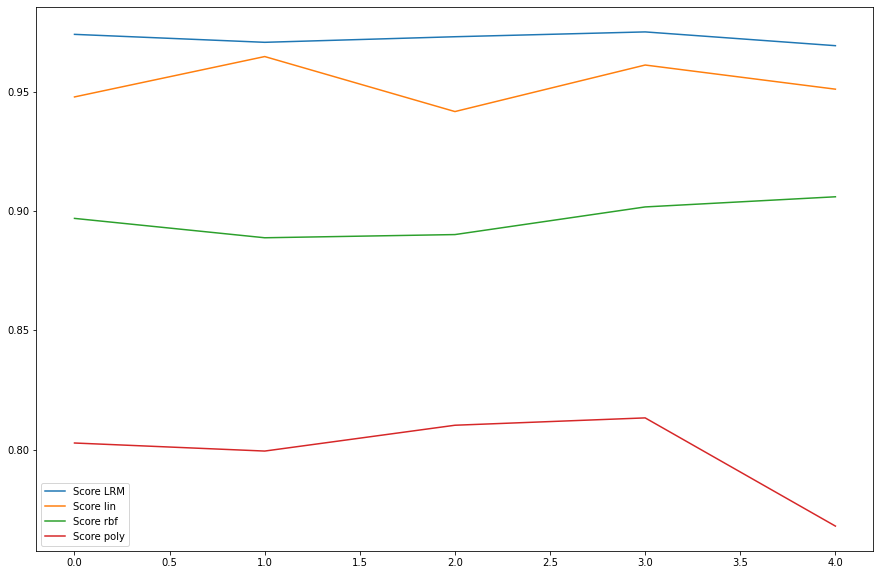

In [13]:
plt.figure(figsize=(15,10))
plt.plot( np.arange(5) , score_LRM , label = 'Score LRM')
plt.plot( np.arange(5) ,score_lin , label = 'Score lin')
plt.plot( np.arange(5) ,score_rbf , label = 'Score rbf')
plt.plot( np.arange(5) ,score_poly , label = 'Score poly')
plt.legend()

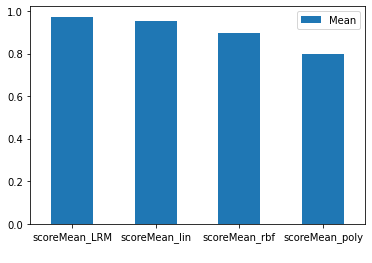

In [14]:
df = pd.DataFrame({' ':['scoreMean_LRM','scoreMean_lin','scoreMean_rbf','scoreMean_poly'], 'Mean':[scoreMean_LRM,scoreMean_lin,scoreMean_rbf,scoreMean_poly]})
ax = df.plot.bar(x=' ', y='Mean', rot=0)

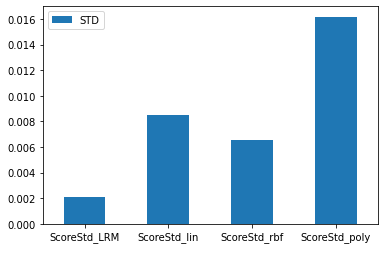

In [15]:
d = pd.DataFrame({' ':['ScoreStd_LRM','ScoreStd_lin','ScoreStd_rbf','ScoreStd_poly'], 'STD':[scoreStd_LRM,scoreStd_lin,scoreStd_rbf,scoreStd_poly]})
s = d.plot.bar(x=' ', y='STD', rot=0)

In [16]:
LRM.fit(X_train,Y_train)
svr_lin.fit(X_train,Y_train)
svr_rbf.fit(X_train,Y_train)
svr_poly.fit(X_train,Y_train)


SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MSE of test_LRM =  0.030779845285296526
R square of test_LRM =  -26.2353128564888
MSE of test_lin =  0.04214664968286684
R square of test_lin =  -36.293143592052154
MSE of test_rbf =  0.04894493481406358
R square of test_rbf =  -42.30855467419319
MSE of test_poly =  0.0008768120446036752
R square of test_poly =  0.2241595066585258


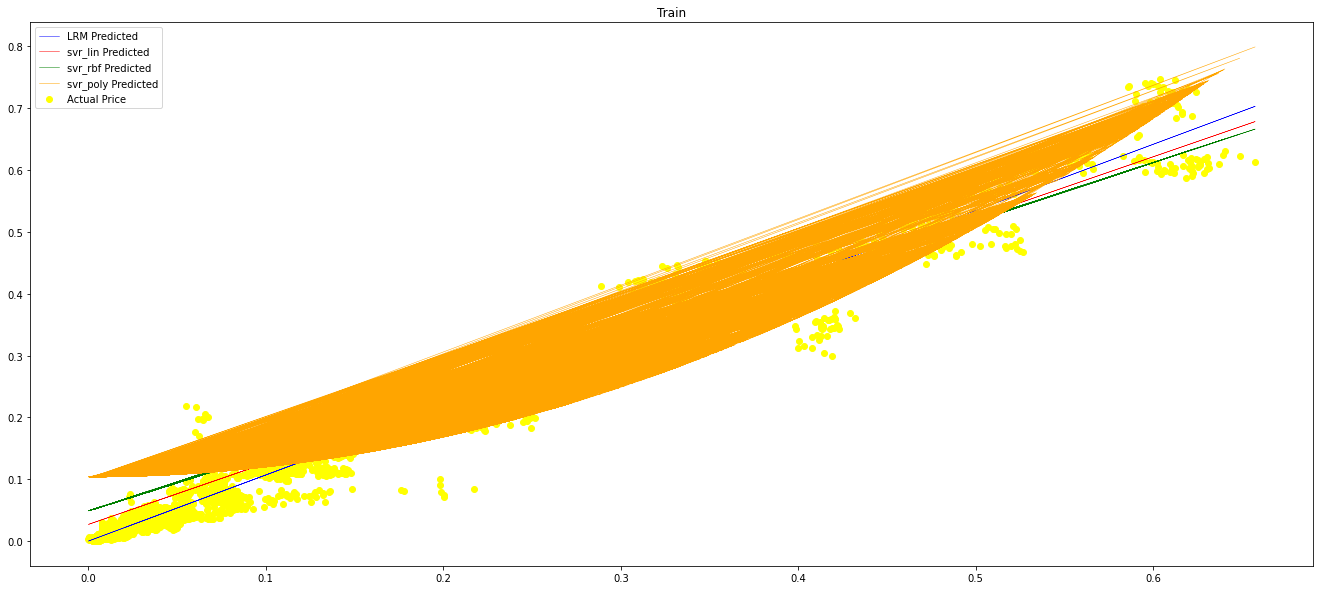

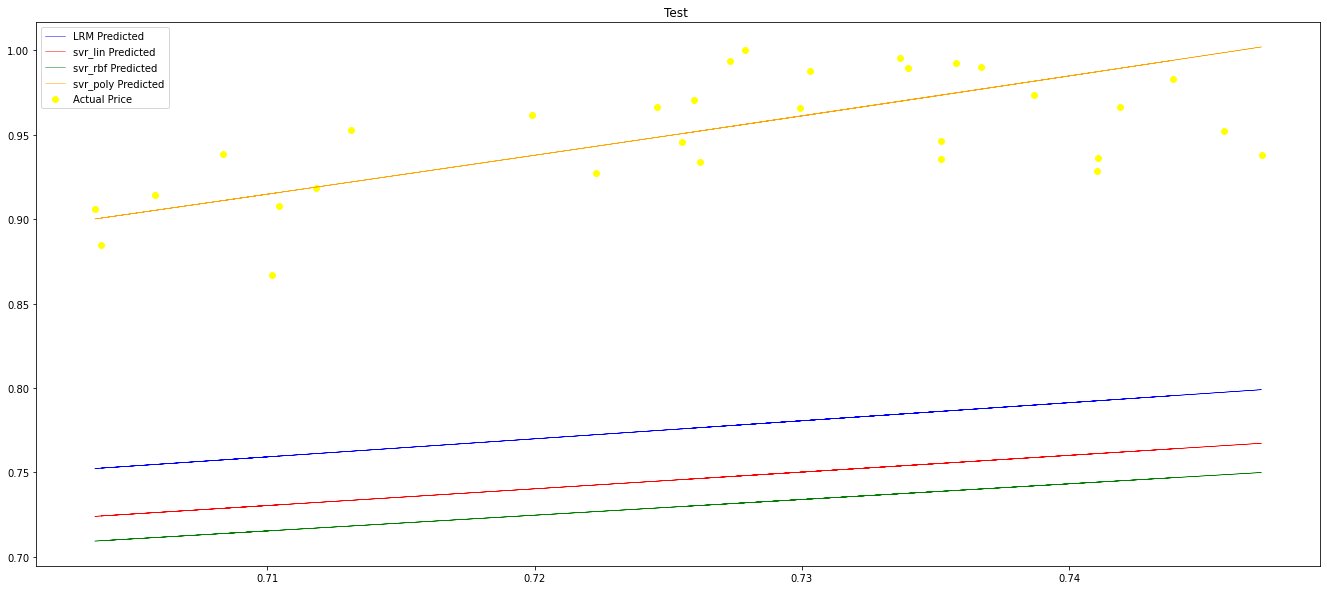

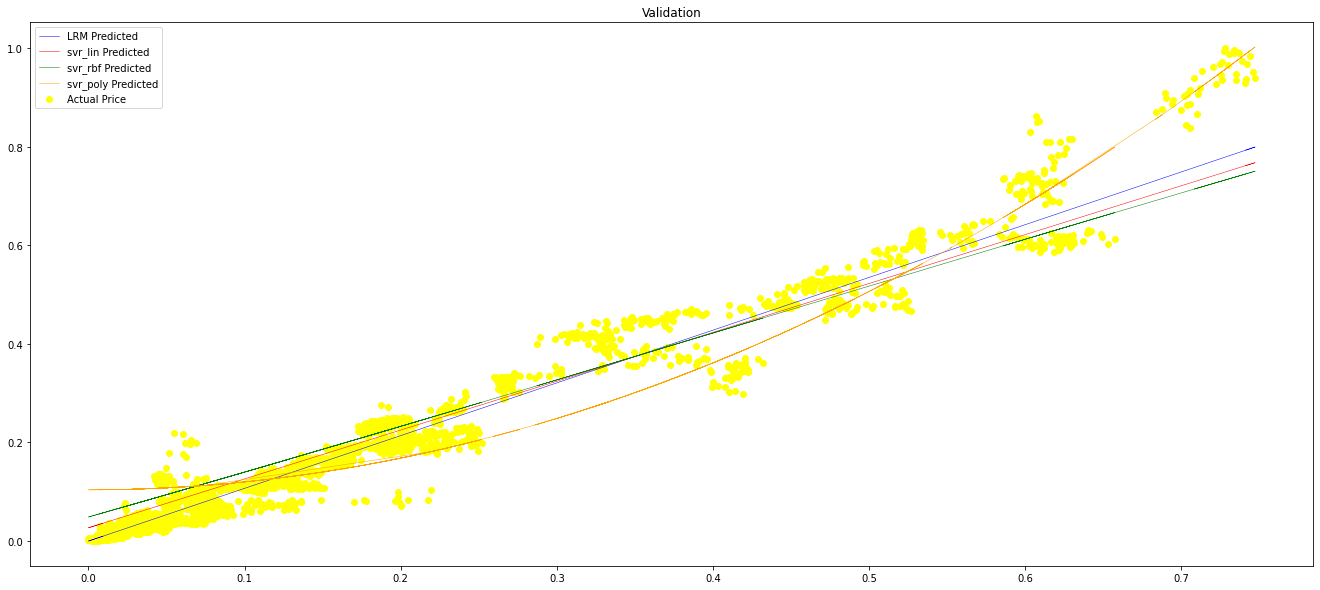

MSE of valid_LRM =  0.00018301443547766438
R square of valid_LRM =  0.9923747842393913
MSE of valid_lin =  0.000669731928338802
R square of valid_lin =  0.9720959144997329
MSE of valid_rbf =  0.0016775327214714772
R square of valid_rbf =  0.9301063388070161
MSE of valid_poly =  0.004607450615942583
R square of valid_poly =  0.808032601574758
Function for the first Graph
 y = 1.0693928806705244 * x + -2.974075624939676e-05


In [17]:
#Train Set Graph
plt.figure(figsize=(23,10))
plt.scatter(X_train, Y_train, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_train, LRM.predict(X_train), color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(X_train, svr_lin.predict(X_train), color='red', linewidth=0.5, label = 'svr_lin Predicted') 
plt.plot(X_train, svr_rbf.predict(X_train), color='green', linewidth=0.5, label = 'svr_rbf Predicted') 
plt.plot(X_train, svr_poly.predict(X_train), color='orange', linewidth=0.5, label = 'svr_poly Predicted') 
plt.title('Train')
plt.legend()

 
#Test Set Graph
predict_t_LRM = LRM.predict(x_test)
predict_t_lin = svr_lin.predict(x_test)
predict_t_rbf = svr_rbf.predict(x_test)
predict_t_poly = svr_poly.predict(x_test)

#ของ predict ที่มีอยู่ (valid)
print('MSE of test_LRM = ' ,metrics.mean_squared_error(y_test, y_pred=predict_t_LRM))
print('R square of test_LRM = ' ,metrics.r2_score(y_test, y_pred=predict_t_LRM))
print('MSE of test_lin = ' ,metrics.mean_squared_error(y_test, y_pred=predict_t_lin))
print('R square of test_lin = ' ,metrics.r2_score(y_test, y_pred=predict_t_lin))
print('MSE of test_rbf = ' ,metrics.mean_squared_error(y_test, y_pred=predict_t_rbf))
print('R square of test_rbf = ' ,metrics.r2_score(y_test, y_pred=predict_t_rbf))
print('MSE of test_poly = ' ,metrics.mean_squared_error(y_test, y_pred=predict_t_poly))
print('R square of test_poly = ' ,metrics.r2_score(y_test, y_pred=predict_t_poly))

plt.figure(figsize=(23,10))
plt.scatter(x_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(x_test, predict_t_LRM, color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(x_test, predict_t_lin, color='red', linewidth=0.5, label = 'svr_lin Predicted') 
plt.plot(x_test, predict_t_rbf, color='green', linewidth=0.5, label = 'svr_rbf Predicted') 
plt.plot(x_test, predict_t_poly, color='orange', linewidth=0.5, label = 'svr_poly Predicted') 
plt.title('Test ')
plt.legend()

C = close[['Close']]
P = close['Prediction']

predict_test_LRM =  LRM.predict(C)
predict_test_lin = svr_lin.predict(C)
predict_test_rbf = svr_rbf.predict(C)
predict_test_poly = svr_poly.predict(C)


plt.figure(figsize=(23,10))
plt.scatter(C, P, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(C,predict_test_LRM, color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(C,predict_test_lin , color='red', linewidth=0.5, label = 'svr_lin Predicted')
plt.plot(C,predict_test_rbf , color='green', linewidth=0.5, label = 'svr_rbf Predicted')
plt.plot(C,predict_test_poly , color='orange', linewidth=0.5, label = 'svr_poly Predicted')
plt.title('Validation')
plt.legend()
plt.show()

#ของ predict ที่มีอยู่ (valid)
print('MSE of valid_LRM = ' ,metrics.mean_squared_error(C, y_pred=predict_test_LRM))
print('R square of valid_LRM = ' ,metrics.r2_score(C, y_pred=predict_test_LRM))
print('MSE of valid_lin = ' ,metrics.mean_squared_error(C, y_pred=predict_test_lin))
print('R square of valid_lin = ' ,metrics.r2_score(C, y_pred=predict_test_lin))
print('MSE of valid_rbf = ' ,metrics.mean_squared_error(C, y_pred=predict_test_rbf))
print('R square of valid_rbf = ' ,metrics.r2_score(C, y_pred=predict_test_rbf))
print('MSE of valid_poly = ' ,metrics.mean_squared_error(C, y_pred=predict_test_poly))
print('R square of valid_poly = ' ,metrics.r2_score(C, y_pred=predict_test_poly))

print("Function for the first Graph") 
m = LRM.coef_[0]
b = LRM.intercept_
print(' y = {0} * x + {1}'.format(m, b))

In [18]:
confidence = LRM.score(X_test, Y_test)
print("confidence: ", confidence)

confidence:  0.9728209072408313


In [19]:
svc_kernel = 'rbf'
c_param = [0.1, 1.00, 10.00, 100.00]
gamma = [0.1,0.5,1.0]
tuned_parameters = {'kernel': [svc_kernel], 'C': c_param, 'gamma': gamma}
model = SVR()
m = model_selection.GridSearchCV(model, tuned_parameters, cv=kf)
m.fit(X_train, Y_train)
print("BEST_PARAM : ", m.best_params_)
print("BEST_SCORE : ", m.best_score_ )

df = pd.DataFrame(m.cv_results_)
df.to_csv("cv_results.csv")


BEST_PARAM :  {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
BEST_SCORE :  0.9418603584402476


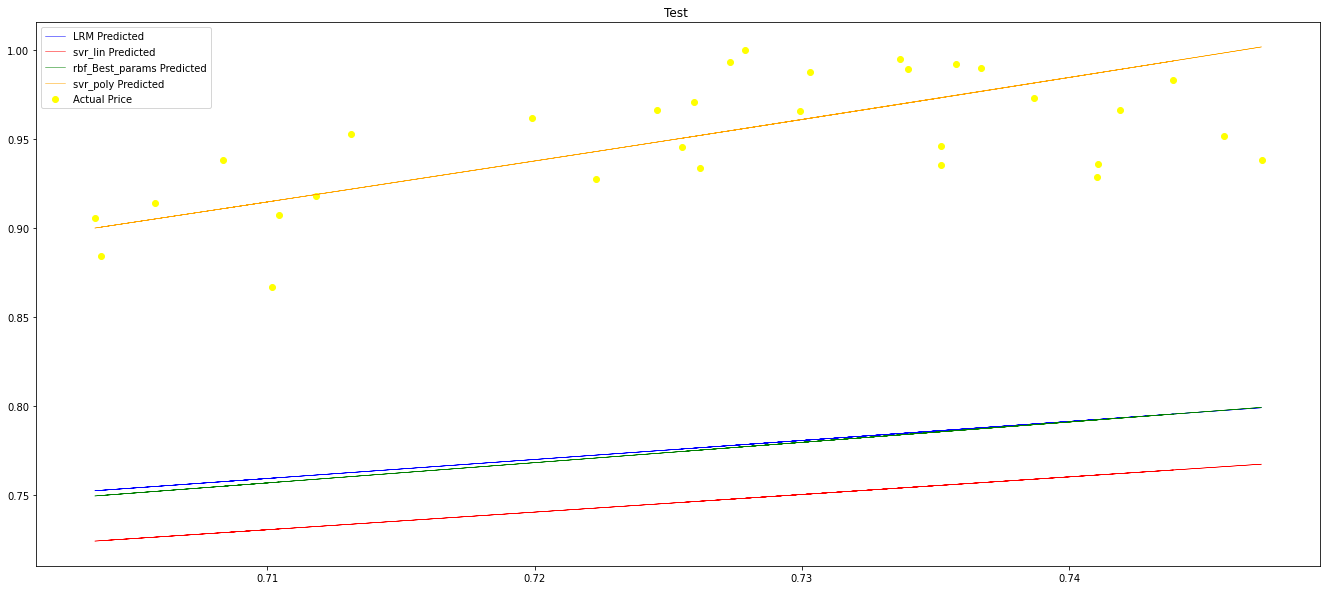

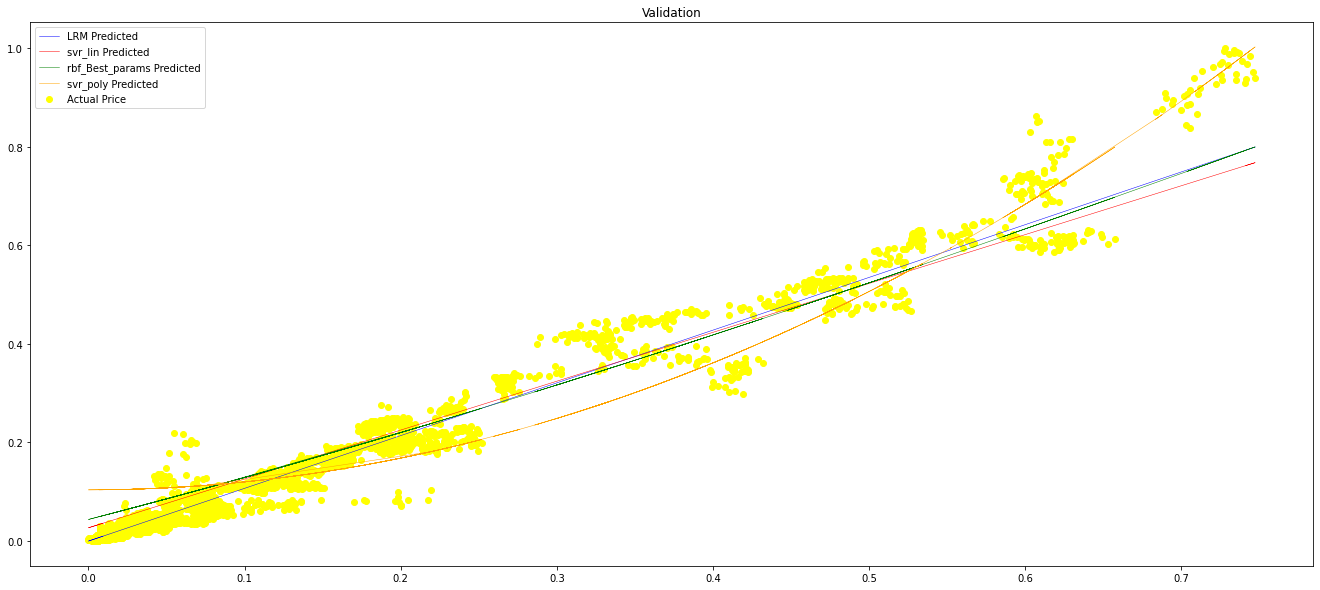

"\n#y_predrbf_best = rbf_Best_params.predict(X_test)\n#y2_predrbf_best = rbf_Best_params.predict(X_test)\n#print('MSE of Validatrion = ' ,metrics.mean_squared_error(y_test, y_pred=y_predrbf_best))\n#print('R square of Validatrion = ' ,metrics.r2_score(y_test, y_pred=y_predrbf_best))\n\nrbf_Best_pred_valid =  rbf_Best_params.predict(X_test)\nrbf_Best_pred_test = rbf_Best_params.predict(C)\n\n#predict validatation\nplt.figure(figsize=(23,10))\nplt.scatter(X_test, Y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints\nplt.plot(X_test,rbf_Best_pred_valid, color='blue', linewidth=0.5, label = 'rbf_Best_pred_valid')\nplt.title('Validation')\nplt.legend()\nplt.show()\n\n#predict test\nplt.figure(figsize=(23,10))\nplt.scatter(C, P, color='yellow', label= 'Actual Price') #plotting the initial datapoints\n\nplt.plot(C,rbf_Best_pred_test , color='red', linewidth=0.5, label = 'rbf_Best_pred_test')\nplt.plot(C,predict_test_LRM, color='blue', linewidth=0.5, label = 'LRM _Be

In [20]:
rbf_Best_params = SVR(kernel='rbf', C=10.0, gamma= 0.1)
svr_lin = SVR(kernel='linear', C=c_val) 
svr_poly = SVR(kernel='poly', C=c_val, degree=2) 
LRM = LinearRegression()  

score_LRM = model_selection.cross_val_score(LRM , X = X_train.values , y = Y_train.values , cv = kf ) 
score_lin = model_selection.cross_val_score(svr_lin , X = X_train.values , y = Y_train.values , cv = kf ) 
score_rbf = model_selection.cross_val_score(rbf_Best_params , X = X_train.values , y = Y_train.values , cv = kf ) 
score_poly = model_selection.cross_val_score(svr_poly , X = X_train.values , y = Y_train.values , cv = kf )

LRM.fit(X_train,Y_train)
svr_lin.fit(X_train,Y_train)
svr_poly.fit(X_train,Y_train)
rbf_Best_params.fit(X_train, Y_train)

predict_t_LRM = LRM.predict(x_test)
predict_t_lin = svr_lin.predict(x_test)
predict_t_rbf = rbf_Best_params.predict(x_test)
predict_t_poly = svr_poly.predict(x_test)
plt.figure(figsize=(23,10))
plt.scatter(x_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(x_test, predict_t_LRM, color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(x_test, predict_t_lin, color='red', linewidth=0.5, label = 'svr_lin Predicted') 
plt.plot(x_test, predict_t_rbf, color='green', linewidth=0.5, label = 'rbf_Best_params Predicted') 
plt.plot(x_test, predict_t_poly, color='orange', linewidth=0.5, label = 'svr_poly Predicted') 
plt.title('Test ')
plt.legend()

C = close[['Close']]
P = close['Prediction']

predict_test_LRM =  LRM.predict(C)
predict_test_lin = svr_lin.predict(C)
predict_test_rbf = rbf_Best_params.predict(C)
predict_test_poly = svr_poly.predict(C)


plt.figure(figsize=(23,10))
plt.scatter(C, P, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(C,predict_test_LRM, color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(C,predict_test_lin , color='red', linewidth=0.5, label = 'svr_lin Predicted')
plt.plot(C,predict_test_rbf , color='green', linewidth=0.5, label = 'rbf_Best_params Predicted')
plt.plot(C,predict_test_poly , color='orange', linewidth=0.5, label = 'svr_poly Predicted')
plt.title('Validation')
plt.legend()
plt.show()

'''
#y_predrbf_best = rbf_Best_params.predict(X_test)
#y2_predrbf_best = rbf_Best_params.predict(X_test)
#print('MSE of Validatrion = ' ,metrics.mean_squared_error(y_test, y_pred=y_predrbf_best))
#print('R square of Validatrion = ' ,metrics.r2_score(y_test, y_pred=y_predrbf_best))

rbf_Best_pred_valid =  rbf_Best_params.predict(X_test)
rbf_Best_pred_test = rbf_Best_params.predict(C)

#predict validatation
plt.figure(figsize=(23,10))
plt.scatter(X_test, Y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(X_test,rbf_Best_pred_valid, color='blue', linewidth=0.5, label = 'rbf_Best_pred_valid')
plt.title('Validation')
plt.legend()
plt.show()

#predict test
plt.figure(figsize=(23,10))
plt.scatter(C, P, color='yellow', label= 'Actual Price') #plotting the initial datapoints

plt.plot(C,rbf_Best_pred_test , color='red', linewidth=0.5, label = 'rbf_Best_pred_test')
plt.plot(C,predict_test_LRM, color='blue', linewidth=0.5, label = 'LRM _Best_pred_test') #plotting the line made by linear regression
plt.plot(C,predict_test_lin , color='red', linewidth=0.5, label = 'svr_lin _Best_pred_test')
plt.plot(C,predict_test_poly , color='orange', linewidth=0.5, label = 'svr_poly _Best_pred_test')
plt.title('TEST')
plt.legend()
print('MSE of Validatrion = ' ,metrics.mean_squared_error(Y_test, y_pred=rbf_Best_pred_valid))
print('R square of Validatrion = ' ,metrics.r2_score(Y_test, y_pred=rbf_Best_pred_valid))
'''


MSE of test_LRM =  0.030779845285296526
R square of test_LRM =  -26.2353128564888
MSE of test_lin =  0.04214664968286684
R square of test_lin =  -36.293143592052154
MSE of rbf_Best_pred_valid =  0.031213212406822604
R square of rbf_Best_pred_valid =  -26.618774469992
MSE of test_poly =  0.0008768120446036752
R square of test_poly =  0.2241595066585258


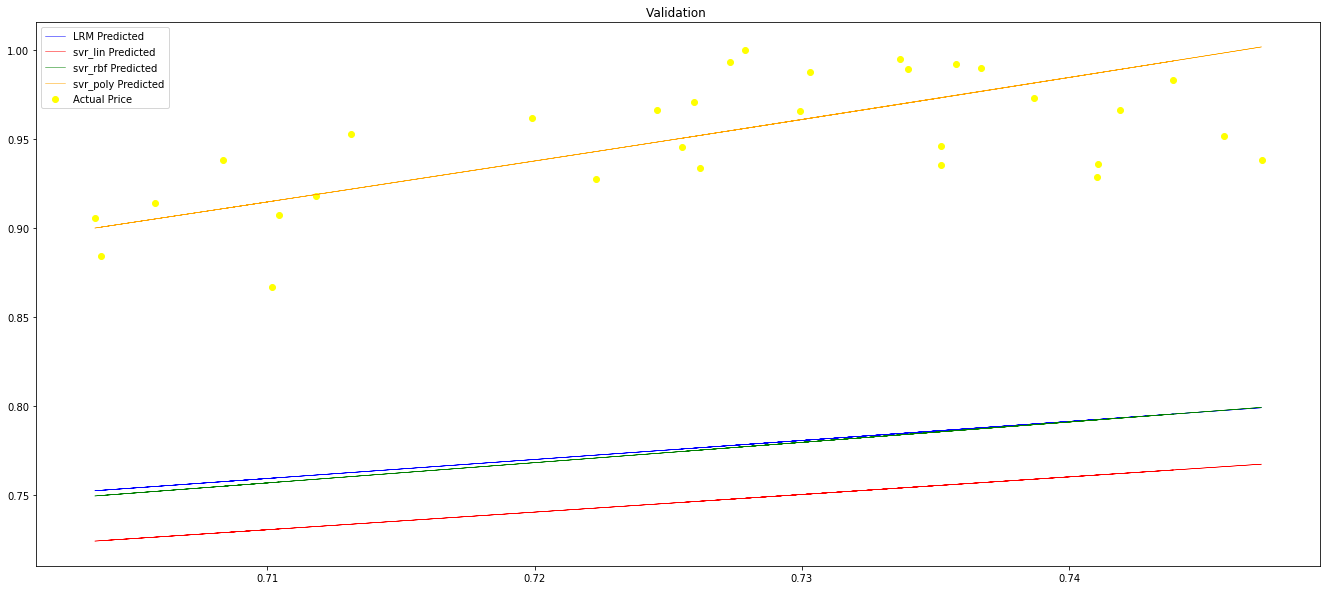

In [21]:
#Test Set Graph
predict_va_LRM = LRM.predict(x_test)
predict_va_lin = svr_lin.predict(x_test)

predict_va_poly = svr_poly.predict(x_test)
rbf_Best_pred_valid =  rbf_Best_params.predict(x_test)
#ของ predict ที่มีอยู่ (valid)
print('MSE of test_LRM = ' ,metrics.mean_squared_error(y_test, y_pred=predict_va_LRM))
print('R square of test_LRM = ' ,metrics.r2_score(y_test, y_pred=predict_va_LRM))
print('MSE of test_lin = ' ,metrics.mean_squared_error(y_test, y_pred=predict_va_lin))
print('R square of test_lin = ' ,metrics.r2_score(y_test, y_pred=predict_va_lin))
print('MSE of rbf_Best_pred_valid = ' ,metrics.mean_squared_error(y_test, y_pred=rbf_Best_pred_valid))
print('R square of rbf_Best_pred_valid = ' ,metrics.r2_score(y_test, y_pred=rbf_Best_pred_valid))
print('MSE of test_poly = ' ,metrics.mean_squared_error(y_test, y_pred=predict_va_poly))
print('R square of test_poly = ' ,metrics.r2_score(y_test, y_pred=predict_va_poly))



plt.figure(figsize=(23,10))
plt.scatter(x_test, y_test, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(x_test, predict_va_LRM, color='blue', linewidth=0.5, label = 'LRM Predicted') #plotting the line made by linear regression
plt.plot(x_test, predict_va_lin, color='red', linewidth=0.5, label = 'svr_lin Predicted') 
plt.plot(x_test, rbf_Best_pred_valid, color='green', linewidth=0.5, label = 'svr_rbf Predicted') 
plt.plot(x_test, predict_va_poly, color='orange', linewidth=0.5, label = 'svr_poly Predicted') 
plt.title('Validation ')
plt.legend()

In [22]:
sudo apt install git

SyntaxError: ignored